# Inputs Metrohm Data and Plots 

In [1]:
# Importing 

import math
import csv
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
def plot_chronoamperometry_data(pathToFile):
    #open the last 5 files
    f1 = open(pathToFile + "/Chrono(5).txt", "r")
    f2 = open(pathToFile + "/Chrono(6).txt", "r")
    f3 = open(pathToFile + "/Chrono(7).txt", "r")
    f4 = open(pathToFile + "/Chrono(8).txt", "r")
    f5 = open(pathToFile + "/Chrono(9).txt", "r")


    csv_f1 = csv.reader(f1)
    csv_f2 = csv.reader(f2)
    csv_f3 = csv.reader(f3)
    csv_f4 = csv.reader(f4)
    csv_f5 = csv.reader(f5)
    
    time = [[],[],[],[],[]]
    current = [[],[],[],[],[]]
    time1 = []
    time2 = []
    time3 = []
    current1 = []
    current2 = []
    current3 = []

    iteration = 0 

    while (iteration < 5):

        if iteration == 0:
            for row in csv_f1: #row 2,7, 12 show time. Row 4, 9, 14 show current
                time1.append(row[2])
                time2.append(row[7])
                time3.append(row[12])
                current1.append(row[4])
                current2.append(row[9])
                current3.append(row[14]) 

        elif iteration == 1:
            # reset vectors  
            time1 = []
            time2 = []
            time3 = []
            current1 = []
            current2 = []
            current3 = []  

            for row in csv_f2: #row 2,7, 12 show time. Row 4, 9, 14 show current      
                time1.append(row[2])
                time2.append(row[7])
                time3.append(row[12])
                current1.append(row[4])
                current2.append(row[9])
                current3.append(row[14])   

        elif iteration == 2:
            # reset vectors  
            time1 = []
            time2 = []
            time3 = []
            current1 = []
            current2 = []
            current3 = []  

            for row in csv_f3: #row 2,7, 12 show time. Row 4, 9, 14 show current      
                time1.append(row[2])
                time2.append(row[7])
                time3.append(row[12])
                current1.append(row[4])
                current2.append(row[9])
                current3.append(row[14]) 
            
        elif iteration == 3:
            # reset vectors  
            time1 = []
            time2 = []
            time3 = []
            current1 = []
            current2 = []
            current3 = []  

            for row in csv_f4: #row 2,7, 12 show time. Row 4, 9, 14 show current      
                time1.append(row[2])
                time2.append(row[7])
                time3.append(row[12])
                current1.append(row[4])
                current2.append(row[9])
                current3.append(row[14])  

        else :
            # reset vectors  
            time1 = []
            time2 = []
            time3 = []
            current1 = []
            current2 = []
            current3 = []  

            for row in csv_f5: #row 2,7, 12 show time. Row 4, 9, 14 show current
                time1.append(row[2])
                time2.append(row[7])
                time3.append(row[12])
                current1.append(row[4])
                current2.append(row[9])
                current3.append(row[14]) 

        # deleting unnecessary data from file- removing "Time (s)"
        del time1[0]
        del time2[0]
        del time3[0]

        # removing empty data to put the time in a single list
        for element in time1: 
            if element != '':    
                time[iteration].append(float(element))
        for element in time2:
            if element != '':    
                time[iteration].append(float(element))
        for element in time3:
            if element != '':    
                time[iteration].append(float(element))   

        # making the time vector begin from 0
        time_shift = time[iteration][0]
        for i in range(len(time[iteration])):
            time[iteration][i] -= time_shift

        # deleting unnecessary data from file- removing "WE(1).Current (A)"
        del current1[0]
        del current2[0]
        del current3[0]

        # removing empty data to put the time in a single list
        for element in current1:
            if element != '':    
                current[iteration].append(float(element))
        for element in current2:
            if element != '':    
                current[iteration].append(float(element))
        for element in current3:
            if element != '':    
                current[iteration].append(float(element))   

        if (iteration == 0):
            f1.close()
        elif (iteration == 1):
            f2.close()
        elif (iteration == 2):
            f3.close()
        elif (iteration == 3):
            f4.close()
        else :
            f5.close()


        if iteration <= 5 :
            iteration += 1

            

    #filter each time signal to remove noise
    current_filtered = [[],[],[],[],[]]
    current_filtered[0] = savgol_filter(current[0], 51, 3)
    current_filtered[1] = savgol_filter(current[1], 51, 3)
    current_filtered[2] = savgol_filter(current[2], 51, 3)
    current_filtered[3] = savgol_filter(current[3], 51, 3)
    current_filtered[4] = savgol_filter(current[4], 51, 3)
    
    # Plotting each graph
    plt.plot(time[0], current[0], label = "Measurement 1")
    plt.plot(time[1], current[1], label = "Measurement 2")
    plt.plot(time[2], current[2], label = "Measurement 3")
    plt.plot(time[3], current[3], label = "Measurement 4")
    plt.plot(time[4], current[4], label = "Measurement 5")
    
    plt.legend(['Measurement 1', 'Measurement 2', 'Measurement 3', 'Measurement 4', 'Measurement 5'], loc='upper left')

    # naming the x axis
    plt.xlabel('Time (s)')
    # naming the y axis
    plt.ylabel('Current(A)')

    # giving a title to my graph
    plt.title('Chronoamperometry- Individual')

    # function to show the plot
    plt.show()

    
    ## Plotting Filtered Current
    
    # Plotting eahc graph
    plt.plot(time[0], current_filtered[0], label = "Measurement 1")
    plt.plot(time[1], current_filtered[1], label = "Measurement 2")
    plt.plot(time[2], current_filtered[2], label = "Measurement 3")
    plt.plot(time[3], current_filtered[3], label = "Measurement 4")
    plt.plot(time[4], current_filtered[4], label = "Measurement 5")
    
    plt.legend(['Measurement 1', 'Measurement 2', 'Measurement 3', 'Measurement 4', 'Measurement 5'], loc='upper left')

    # naming the x axis
    plt.xlabel('Time (s)')
    # naming the y axis
    plt.ylabel('Current(A)')

    # giving a title to my graph
    plt.title('Chronoamperometry- Individual (Filtered)')

    # function to show the plot
    plt.show()

    # plotting average of 3 plots

    ## calculating average time and putting it in array
    time_average = []
    current_average = []

    for column in range(len(time[0])):
        time_average.append((time[0][column]+time[1][column]+time[2][column])/3)
    for column in range(len(current[0])):
        current_average.append((current[0][column]+current[1][column]+current[2][column])/3)

    plt.plot(time_average, current_average)

    # naming the x axis
    plt.xlabel('Time (s)')
    # naming the y axis
    plt.ylabel('Current(A)')

    # giving a title to my graph
    plt.title('Chronoamperometry- Average')

    # function to show the plot
    plt.show()


    ## Average of filtered current
    time_average = []
    current_average_filtered = []

    for column in range(len(time[0])):
        time_average.append((time[0][column]+time[1][column]+time[2][column]+time[3][column]+time[4][column])/5)
    for column in range(len(current[0])):
        current_average_filtered.append((current_filtered[0][column]+current_filtered[1][column]+current_filtered[2][column]+current_filtered[3][column]+current_filtered[4][column])/5)

    plt.plot(time_average, current_average_filtered)
    
    # naming the x axis
    plt.xlabel('Time (s)')
    # naming the y axis
    plt.ylabel('Current(A)')

    # giving a title to my graph
    plt.title('Chronoamperometry_Filtered- Average')

    # function to show the plot
    plt.show()


    current_average_approaching = 0
    current_average_filtered_approaching = 0
    bound = len(current_average)
    
    for i in range(15):
        current_average_approaching = current_average_approaching + current_average[bound-1-i]
    current_average_approaching = current_average_approaching / 15
    
    for i in range(15):
        current_average_filtered_approaching = current_average_filtered_approaching + current_average_filtered[bound-1-i]
    current_average_filtered_approaching = current_average_filtered_approaching / 15
    
    max_current = 0 ;
    max_current_filtered = 0;
    
    for i in range(len(current_average)):
        if current_average[i] > max_current:
            max_current = current_average[i] ;
            
    for i in range(len(current_average_filtered)):
        if current_average_filtered[i] > max_current_filtered:
            max_current_filtered = current_average_filtered[i] ;
                   
        

    values = [[],[],[],[],[]]
    values[0].append(time[0])
    values[1].append(current_average)
    values[2].append(current_average_filtered)
    values[3].append(current_average_approaching)
    values[3].append(current_average_filtered_approaching)
    values[4].append(max_current)
    values[4].append(max_current_filtered)
    return values





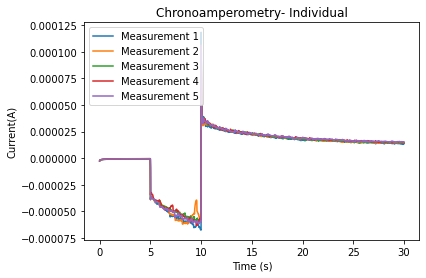

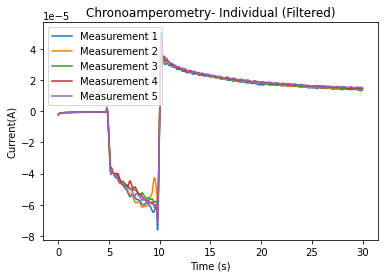

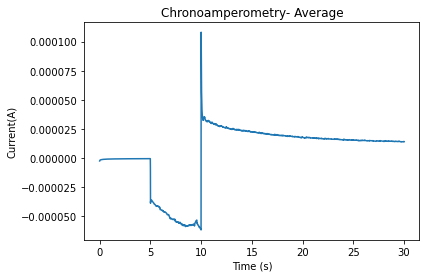

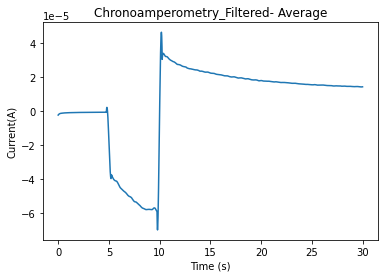

In [3]:
pathToFile = "//Users/michael/Downloads/Pure Pt probe CV rev3/40mM/Chrono/"
FortymM = plot_chronoamperometry_data(pathToFile)

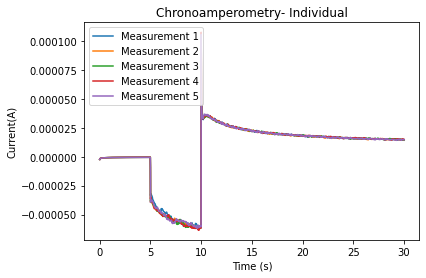

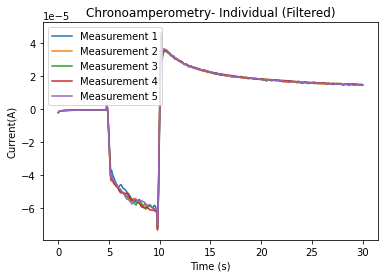

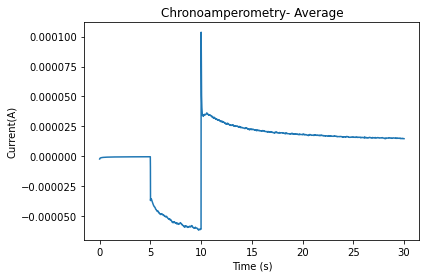

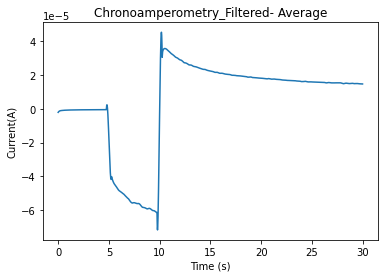

In [4]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/35mM/Chrono/"
ThirtyFivemM = plot_chronoamperometry_data(pathToFile)

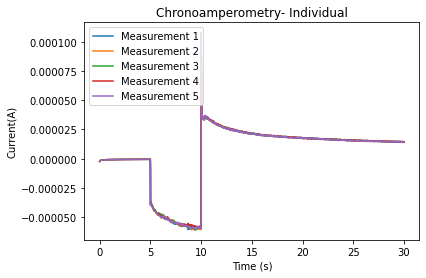

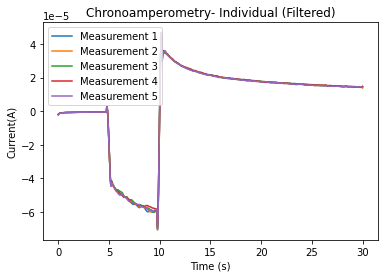

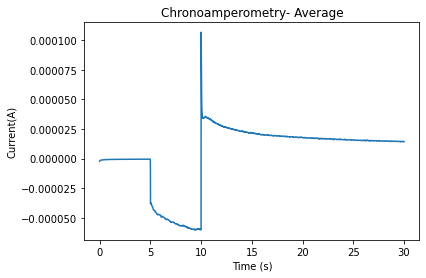

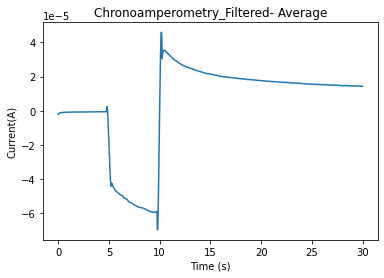

In [5]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/30mM/Chrono/"
ThirtymM = plot_chronoamperometry_data(pathToFile)

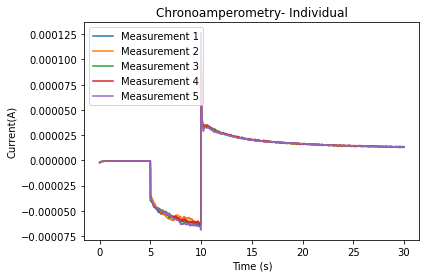

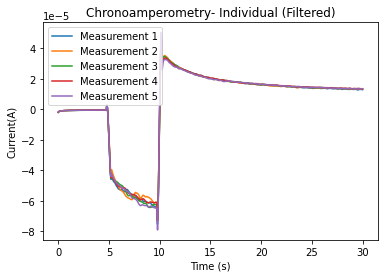

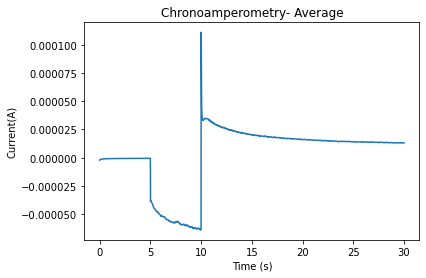

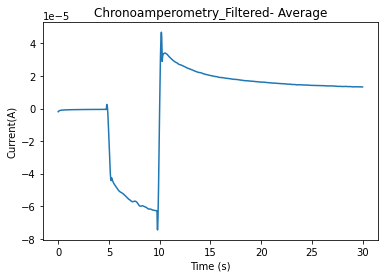

In [6]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/25mM/Chrono/"
TwentyfivemM = plot_chronoamperometry_data(pathToFile)

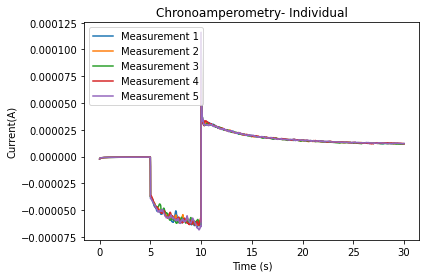

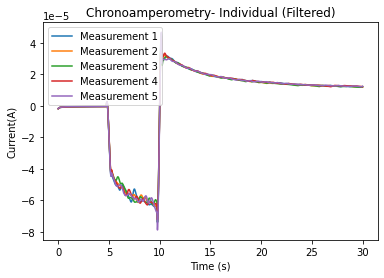

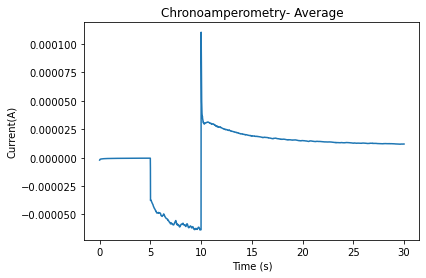

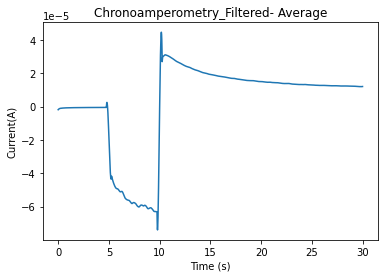

In [7]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/20mM/Chrono/"
TwentymM = plot_chronoamperometry_data(pathToFile)

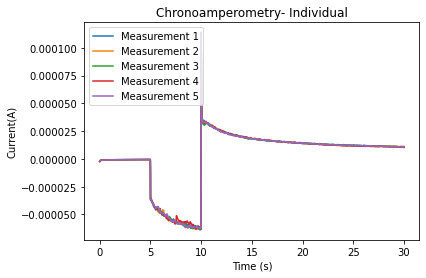

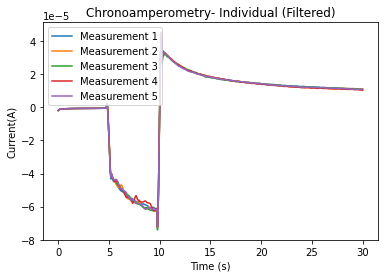

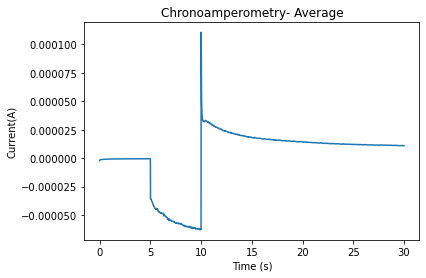

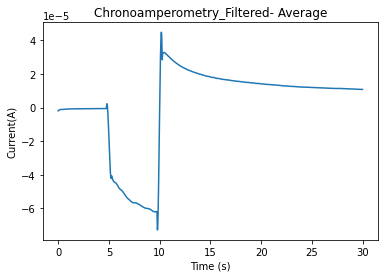

In [8]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/15mM/Chrono/"
FifteenmM = plot_chronoamperometry_data(pathToFile)

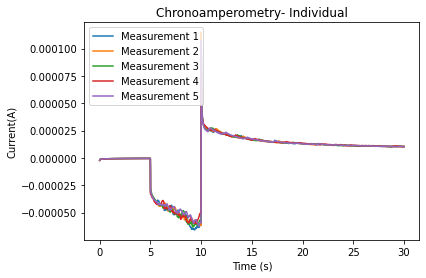

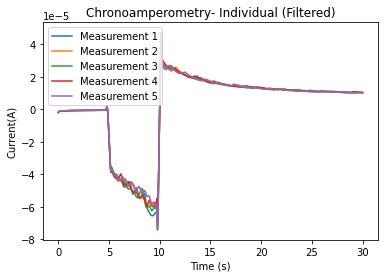

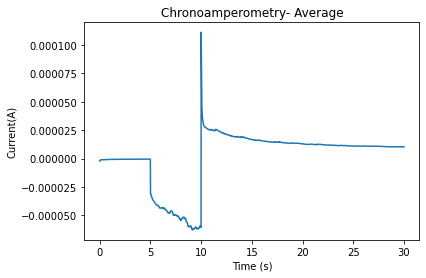

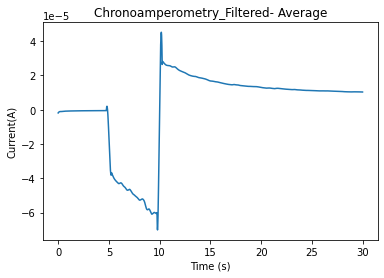

In [9]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/10mM/Chrono/"
TenmM =plot_chronoamperometry_data(pathToFile)

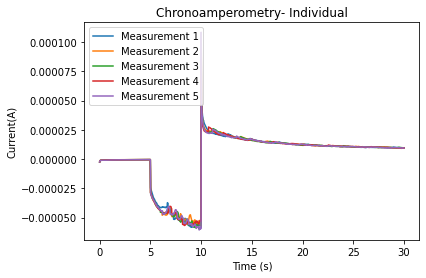

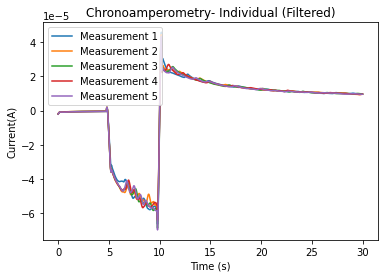

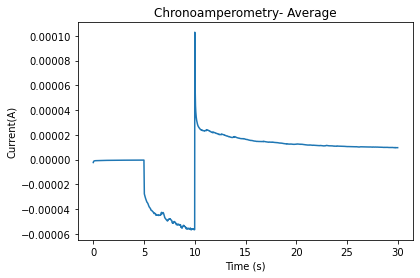

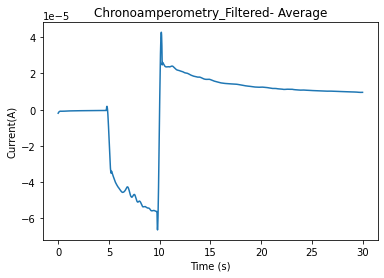

In [10]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/5mM/Chrono/"
FivemM = plot_chronoamperometry_data(pathToFile)

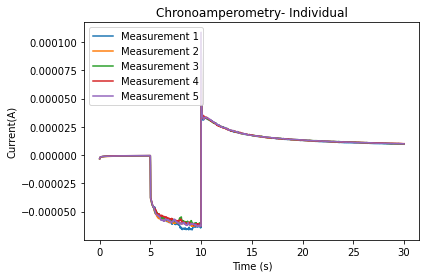

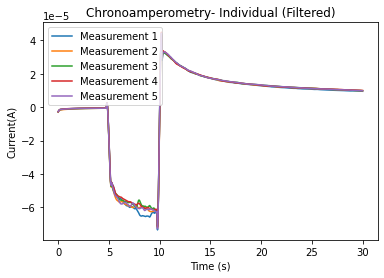

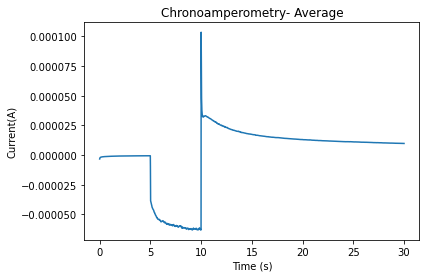

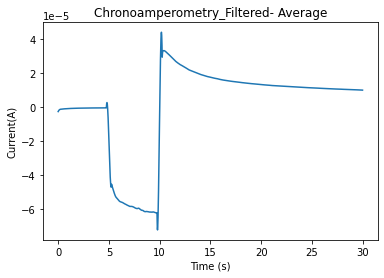

In [11]:
pathToFile = "/Users/michael/Downloads/Pure Pt probe CV rev3/0mM/Chrono/"
ZeromM = plot_chronoamperometry_data(pathToFile)

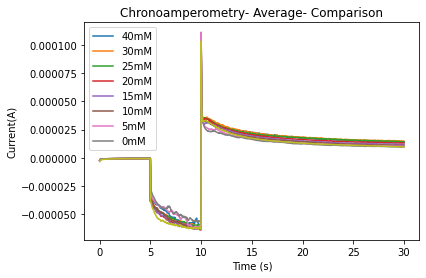

In [12]:
plt.plot(FortymM[0][0], FortymM[1][0], label = "40mM")
plt.plot(ThirtyFivemM[0][0], ThirtyFivemM[1][0], label = "35mM")
plt.plot(ThirtymM[0][0], ThirtymM[1][0], label = "30mM")
plt.plot(TwentyfivemM[0][0], TwentyfivemM[1][0], label = "25mM")
plt.plot(TwentymM[0][0], TwentymM[1][0], label = "20mM")
plt.plot(FifteenmM[0][0], FifteenmM[1][0], label = "15mM")
plt.plot(TenmM[0][0], TenmM[1][0], label = "10mM")
plt.plot(FivemM[0][0], FivemM[1][0], label = "5mM")
plt.plot(ZeromM[0][0], ZeromM[1][0], label = "0mM")

plt.legend(['40mM', '30mM', '25mM', '20mM', '15mM', '10mM', '5mM', '0mM'], loc='upper left')

# naming the x axis
plt.xlabel('Time (s)')
# naming the y axis
plt.ylabel('Current(A)')

# giving a title to my graph
plt.title('Chronoamperometry- Average- Comparison')

# function to show the plot
plt.show()


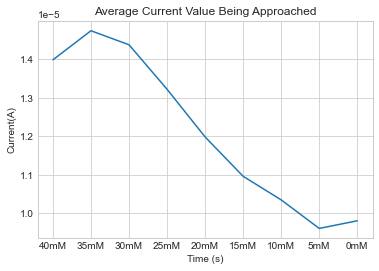

In [24]:
concentrations = ['40mM','35mM', '30mM', '25mM', '20mM', '15mM', '10mM', '5mM', '0mM']
current_values = [FortymM[3][0],ThirtyFivemM[3][0],ThirtymM[3][0],TwentyfivemM[3][0],TwentymM[3][0],FifteenmM[3][0],TenmM[3][0],FivemM[3][0],ZeromM[3][0]]


plt.style.use('seaborn-whitegrid')
plt.title('Average Current Value Being Approached')
plt.xlabel('Time (s)')
plt.ylabel('Current(A)')
plt.plot(concentrations, current_values);

In [40]:
values_for_calibration = {'concentrations' : [40,35,30,25,20,15,10,5,0],
                         'current_values' : current_values } ;

pd.options.display.float_format = "{:,.8f}".format
calibration_data = pd.DataFrame(data = values_for_calibration)
calibration_data


,concentrations,current_values
0,40,0.00001398
1,35,0.00001474
2,30,0.00001437
3,25,0.00001322
4,20,0.00001198
5,15,0.00001096
6,10,0.00001035
7,5,0.00000961
8,0,0.00000980


In [29]:
from sklearn.linear_model import LinearRegression

coefficient of determination: 0.9144063978618768


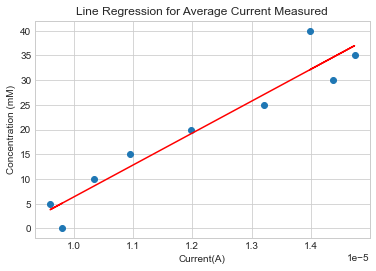

In [30]:
x = np.array(current_values).reshape((-1,1))
y = np.array([40,35,30,25,20,15,10,5,0])

model = LinearRegression().fit(x, y)

x_lin_reg = x
y_lin_reg = model.predict(x_lin_reg)
plt.title('Line Regression for Average Current Measured')
plt.ylabel('Concentration (mM)')
plt.xlabel('Current(A)')
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.9856137969988138


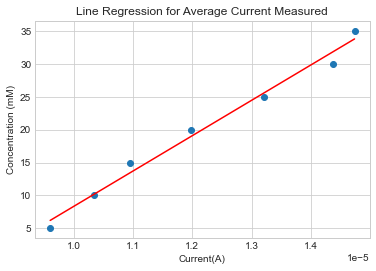

In [31]:
x = np.array(current_values)
x = np.delete(x,[0,8],None).reshape((-1,1))
y = np.array([35,30,25,20,15,10,5])

model = LinearRegression().fit(x, y)

x_lin_reg = x
y_lin_reg = model.predict(x_lin_reg)
plt.title('Line Regression for Average Current Measured')
plt.ylabel('Concentration (mM)')
plt.xlabel('Current(A)')
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

In [38]:
#print('intercept:', model.intercept_)
#print('coefficients:', model.coef_)

currentMeasured = 0.000012
concentration = model.coef_ * currentMeasured + model.intercept_
print(concentration)

[19.06787497]


In [41]:
currentMeasured = 0.00001069
concentration = model.coef_ * currentMeasured + model.intercept_
print(concentration)

[12.03466782]
